
# Project:  Indicators of Life Expectancy Among the Countries with the Highest and the Lowest Human Development Index

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#frames_prep">Data frames preparation</a></li>
<li><a href="#eda">Exploratory data analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 > **Aim of the project**: The main goal of this project is to investigate relationships between specific life expectancy indicators and life expectancy. The analyses will be performed for a country representing the most and the least developed areas of the world to check for eventual discrepancies in indicators' significance.
 
> **Data selection**: Data sets available on Gapminder were used to assess the goals of the project. 

> **Datasets justification/specification**: Information found on an external source (listed below) stated that life expectancy is generally significantly different for men and women. For the purposes of the current project, and due to the time constraints, I chose to work further with the female data, although investigation of the male data sets, could provide a deeper understanding of if and how the sex differences might be related to life expectancy and its indicators. Therefore **the dependent variable** for this study is: female life expectancy. The external sources were also used to determine the factors that will be investigated in the current project as potential indicators of life expectancy. The following **independent variables (variable name)** have been chosen: 1) body mass index (BMI), 2) blood cholesterol levels (Cholesterol), 3) new cancer cases per 100 000 residents (Cancer), 4) the percentage of total employees working in the industry (Industry), and 5) the percentage of women above 15 years old that smokes (Smoking). When making the choice about which cancer type to include in the analyses, the breasts cancer has been chosen, as it is worldwide the most commonly diagnosed cancers among women. The analyses were performed for the **year range**: 1980-2008, as for this period of time the data was available for most (but not all) of the investigated variables. Further on, I thought it would be important to investigate at least one developed and developing country, and later on, compare them to each other. One more time, I sought out an external resource to make a decision about which countries to choose. As it goes for the developed countries, Norway has currently the highest Human Development Index (HDI) worldwide. However, for the current project, I chose **Switzerland** (second in the ranking) as a representative of developed countries, as its data sets required more cleaning and included null values, something that I was hoping for, as it offers more learning opportunities. As it goes for the developing countries, I chose **Somalia** similarly simply because it has the lowest HDI and some incomplete data. 


> **Research questions**: 
> 1. Which of the independent variables are the best predictors of life expectancy? In other words, what is the best-fit model for life expectancy in developing and developed countries? 
> 2. Do, and if yes how the developing and developed countries differ in terms of the predictive value of the independent variables? In other words, are there differences in terms of the variable's significance between developing and developed countries? 

> **Sources**: 
            >  - Indicators of Life Expectancy: https://www.quotacy.com/what-are-the-risk-factors-that-affect-buying-life-insurance/ 
             >  - Human Development Index : https://worldpopulationreview.com/countries/developed-countries/
             >  - Worldwide Cancer Data: https://www.wcrf.org/dietandcancer/cancer-trends/worldwide-cancer-data

In [1]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For this project I will be working with big data sets, and I want Python to display whole data instead of the truncated data, so I will change the display settings.

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/home/maggie/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


<a id='wrangling'></a>
## Data Wrangling



### General Properties

As an exmaple of a dataframe that I will be working with I loaded below the data for female life expectancy. 

In [3]:
pd.read_csv('life_expectancy_f.csv')

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.4,28.6,29.2,29.7,30.2,30.7,31.2,31.7,32.2,32.7,33.1,33.6,34.0,34.5,34.9,35.3,35.8,36.2,36.6,37.1,37.5,38.0,38.4,38.9,39.4,39.9,40.4,40.9,41.5,42.1,42.7,43.4,44.1,44.8,45.6,46.5,47.3,48.2,49.1,50.0,50.9,51.7,52.4,53.1,53.6,54.2,54.7,55.2,55.6,56.1,56.7,57.2,57.8,58.5,59.1,59.7,60.3,60.9,61.5,62.0,62.5,62.9,63.4,63.8,64.2,64.6,65.0,65.4,65.8,66.2,66.5,66.9,67.2,67.5,67.8,68.1,68.4,68.7,69.0,69.2,69.5,69.7,70.0,70.2,70.4,70.6,70.8,71.1,71.3,71.5,71.7,71.9,72.1,72.2,72.4,72.6,72.8,73.0,73.1,73.3,73.5,73.6,73.8,74.0,74.1,74.3,74.5,74.6,74.8,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,76.9,77.1,77.2,77.3,77.5,77.6,77.7,77.8,78.0,78.1,78.2,78.4,78.5,78.6,78.7,78.9,79.0,79.1,79.2,79.4,79.5,79.6,79.7,79.9,80.0,80.1,80.2
1,Albania,55.2,55.3,55.7,56.3,56.9,57.7,58.7,59.8,60.9,62.1,63.2,64.3,65.3,66.0,66.6,67.0,67.3,67.5,67.8,68.1,68.4,68.8,69.2,69.6,70.0,70.4,70.7,71.0,71.4,71.7,72.1,72.5,72.9,73.3,73.7,74.2,74.5,74.7,74.9,75.0,75.0,75.0,75.0,75.0,75.2,75.4,75.6,75.9,76.3,76.6,77.0,77.3,77.5,77.8,78.0,78.2,78.3,78.5,78.7,79.0,79.2,79.5,79.7,79.9,80.1,80.3,80.5,80.6,80.7,80.9,81.0,81.2,81.3,81.5,81.6,81.8,81.9,82.0,82.2,82.3,82.5,82.6,82.7,82.9,83.0,83.1,83.3,83.4,83.5,83.7,83.8,83.9,84.1,84.2,84.3,84.5,84.6,84.7,84.8,85.0,85.1,85.2,85.3,85.5,85.6,85.7,85.8,86.0,86.1,86.2,86.3,86.5,86.6,86.7,86.8,86.9,87.0,87.2,87.3,87.4,87.5,87.6,87.8,87.9,88.0,88.1,88.2,88.4,88.5,88.6,88.7,88.8,89.0,89.1,89.2,89.3,89.4,89.5,89.7,89.8,89.9,90.0,90.1,90.2,90.3,90.5,90.6,90.7,90.8,90.9
2,Algeria,42.7,42.9,43.3,43.7,44.2,44.6,45.0,45.5,45.9,46.4,46.9,47.3,47.8,48.3,48.7,49.2,49.6,50.0,50.4,50.8,51.2,51.6,52.0,52.5,53.1,53.7,54.6,55.6,56.7,58.0,59.4,60.8,62.2,63.5,64.6,65.6,66.4,67.0,67.5,67.9,68.3,68.6,68.8,69.1,69.4,69.7,70.0,70.4,70.9,71.3,71.7,72.2,72.7,73.2,73.7,74.1,74.6,75.0,75.3,75.6,75.9,76.2,76.4,76.6,76.9,77.1,77.3,77.6,77.8,78.0,78.2,78.4,78.6,78.8,79.0,79.2,79.4,79.6,79.8,80.0,80.2,80.3,80.5,80.7,80.8,81.0,81.2,81.3,81.5,81.7,81.8,82.0,82.1,82.3,82.4,82.6,82.7,82.9,83.0,83.1,83.3,83.4,83.6,83.7,83.8,84.0,84.1,84.3,84.4,84.5,84.7,84.8,84.9,85.0,85.2,85.3,85.4,85.6,85.7,85.8,85.9,86.1,86.2,86.3,86.4,86.6,86.7,86.8,86.9,87.1,87.2,87.3,87.4,87.5,87.7,87.8,87.9,88.0,88.1,88.3,88.4,88.5,88.6,88.7,88.8,89.0,89.1,89.2,89.3,89.4
3,Angola,32.4,32.5,32.7,32.9,33.1,33.3,33.6,33.8,34.1,34.4,34.7,35.1,35.4,35.8,36.2,36.6,37.0,37.4,37.8,38.2,38.6,39.0,39.4,39.8,40.3,40.7,41.0,41.4,41.7,42.0,42.3,42.5,42.7,42.9,43.0,43.2,43.3,43.4,43.5,43.7,43.9,44.1,44.3,44.6,44.9,45.4,46.0,46.7,47.5,48.5,49.5,50.6,51.8,53.0,54.2,55.4,56.6,57.7,58.8,59.9,60.9,61.8,62.6,63.2,63.7,64.1,64.4,64.7,64.9,65.2,65.5,65.8,66.1,66.4,66.7,66.9,67.2,67.5,67.7,68.0,68.3,68.5,68.7,69.0,69.2,69.4,69.6,69.9,70.1,70.3,70.5,70.7,70.9,71.1,71.3,71.5,71.7,71.8,72.0,72.2,72.4,72.5,72.7,72.9,73.0,73.2,73.3,73.5,73.7,73.8,74.0,74.1,74.3,74.4,74.5,74.7,74.8,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.3,76.5,76.6,76.7,76.9,77.0,77.1,77.2,77.4,77.5,77.6,77.7,77.9,78.0,78.1,78.2,78.3,78.5,78.6,78.7,78.8,78.9,79.0
4,Antigua and Barbuda,59.8,60.0,60.5,61.0,61.5,61.9,62.4,62.9,63.3,63.7,64.2,64.6,65.0,65.4,65.8,66.2,66.6,67.0,67.4,67.7,68.1,68.4,68.8,69.1,69.4,69.8,70.1,70.4,70.7,71.0,71.2,71.5,71.8,72.1,72.3,7

In [4]:
pd.read_csv('life_expectancy_f.csv').shape

(184, 151)

We can see that it is a big dataset with a list of 184 countries and years range of about 150 years. I performed some initial data exploration in another Jupyter notebook, to get a good overview of the sets I will be working with. In the way presented below, I checked all twelve data sets (2 countries x (1 dependent variable + 5 independent variables)) for their year range, variables' type, eventual duplicates, and null values. 

In [5]:
pd.read_csv('industry_occupation_f.csv').duplicated().sum()

0

In [6]:
pd.read_csv('smoking_f.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  130 non-null    object 
 1   2000     130 non-null    float64
 2   2001     0 non-null      float64
 3   2002     130 non-null    float64
 4   2003     0 non-null      float64
 5   2004     0 non-null      float64
 6   2005     130 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.2+ KB


This initial exploration of the datasets revealed that the industry and smoking data sets have a shorter year range that most of the variables before (see above). This might have some influence on the strength of their relationships with the dependent variable. I will definitely keep it in mind when performing analyses later on. None of the data sets have duplicates values, whereas some of them have null values, which I will fill in in the next section.

### Defining a function

In the following step, I will first create a function that will help me to automate the process of loading the dataframes for chosen countries and the specific range of years. 

In [7]:
selected_countries = ['Switzerland','Somalia']
selected_years = {'from': 1980, 'to': 2008}

In [8]:
# Define the function's name and its parameters
def read_and_select_data(filename, selected_years, selected_countries):

    # Read the csv file    
    df = pd.read_csv(filename)
    
    # Filter rows by country
    df = df[df['country'].isin(selected_countries)]

    # Filter columns by year-range 
    cols_to_keep = ['country'] + [str(year) for year in range(selected_years['from'], selected_years['to'] + 1)]
    df = df.loc[:,cols_to_keep]
    
    return df

<a id='frames_prep'></a>
### Data frames preparation

In the following steps, I will call the above-defined function on all six variables of interest: Life Expectancy, BMI, Cholesterol, Cancer, Industry, and Smoking.

In [9]:
life = read_and_select_data('life_expectancy_f.csv', selected_years, selected_countries)

In [10]:
life

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
147,Somalia,46.3,46.7,47.0,47.3,47.6,47.7,47.8,47.7,47.5,47.2,47.0,46.8,46.9,47.3,47.9,48.7,49.7,50.6,51.4,52.0,52.5,52.8,53.1,53.4,53.7,54.0,54.3,54.6,54.9
159,Switzerland,79.0,79.2,79.4,79.6,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1,81.2,81.4,81.5,81.7,81.9,82.1,82.2,82.4,82.6,82.8,83.0,83.2,83.4,83.6,83.8,84.0,84.2


For the purposes of the further analyses,  I will transpose each of the loaded data frames, get rid of the country column, and change indexes to the variables name, including country name. 

In [11]:
Life_Expectancy = life.T

Life_Expectancy.drop(labels='country',inplace=True)
Life_Expectancy.rename(columns={147: "Life expect. Somalia", 159: "Life expect. Switzerland"},inplace=True)
Life_Expectancy

,Life expect. Somalia,Life expect. Switzerland
1980,46.3,79
1981,46.7,79.2
1982,47,79.4
1983,47.3,79.6
1984,47.6,79.8
1985,47.7,80
1986,47.8,80.2
1987,47.7,80.4
1988,47.5,80.6
1989,47.2,80.8


In [12]:
bmi = read_and_select_data('bmi_f.csv', selected_years, selected_countries)
bmi

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
152,Somalia,20.8,20.9,20.9,21.0,21.0,21.1,21.1,21.2,21.3,21.4,21.4,21.5,21.6,21.6,21.7,21.7,21.8,21.8,21.9,22.0,22.0,22.1,22.2,22.3,22.3,22.4,22.5,22.6,22.7
164,Switzerland,23.7,23.8,23.8,23.8,23.8,23.8,23.8,23.8,23.9,23.9,23.9,23.9,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.1,24.1,24.1,24.1,24.1,24.1,24.1


In [13]:
BMI = bmi.T

BMI.drop(labels='country',inplace=True)
BMI.rename(columns={152: "BMI Somalia", 164: "BMI Switzerland"},inplace=True)
BMI

,BMI Somalia,BMI Switzerland
1980,20.8,23.7
1981,20.9,23.8
1982,20.9,23.8
1983,21,23.8
1984,21,23.8
1985,21.1,23.8
1986,21.1,23.8
1987,21.2,23.8
1988,21.3,23.9
1989,21.4,23.9


In [14]:
chol = read_and_select_data('cholesterol_f.csv', selected_years, selected_countries)
chol

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
152,Somalia,4.66,4.64,4.63,4.61,4.59,4.57,4.56,4.54,4.53,4.52,4.51,4.5,4.48,4.47,4.45,4.44,4.43,4.41,4.40,4.39,4.38,4.37,4.36,4.36,4.35,4.34,4.34,4.33,4.33
164,Switzerland,5.97,5.95,5.92,5.90,5.88,5.86,5.83,5.81,5.78,5.76,5.73,5.7,5.67,5.64,5.61,5.58,5.54,5.50,5.47,5.44,5.40,5.38,5.35,5.33,5.30,5.29,5.27,5.25,5.24


In [15]:
Cholesterol = chol.T

Cholesterol.drop(labels='country',inplace=True)
Cholesterol.rename(columns={152:'Cholesterol Somalia',164: "Cholesterol Switzerland"},inplace=True)
Cholesterol

,Cholesterol Somalia,Cholesterol Switzerland
1980,4.66,5.97
1981,4.64,5.95
1982,4.63,5.92
1983,4.61,5.9
1984,4.59,5.88
1985,4.57,5.86
1986,4.56,5.83
1987,4.54,5.81
1988,4.53,5.78
1989,4.52,5.76


In [16]:
# The initial exploration analysis revealed that the cancer data set has quite a lot of null values
# That is why first I will add the suffix _NaN to the variable name

cancer_NaN = read_and_select_data('cancer_new_cases_f.csv', selected_years,selected_countries)

cancer_NaN

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
150,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1,22.2,22.3,22.4,22.6,22.7,22.8,22.8,22.8,22.9,22.9,22.9,22.9,23.0,23.0,23.1,23.1,23.1,23.2
162,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,99.0,99.1,99.2,99.4,99.6,99.2,99.0,98.7,98.5,98.3,97.4,96.6,95.7,95.0,94.3,94.0,93.8,93.6


For both countries, we can see missing values for the years 1980-1989. During the initial exploration (in another notebook) of the cancer data set, I discovered that out of all 184 countries, four of them are having no missing values for this data set: Denmark, Finland, Norway, and Sweden. Therefore I decided to do some visual data exploration to check how their data was distributed in the years 1980-1989, and later on, use those findings to fill the missing data for Somalia and Switzerland. 

In [17]:
cancer_countries = ['Norway', 'Denmark','Sweden','Finland']

cancer_explore = read_and_select_data('cancer_new_cases_f.csv', selected_years,cancer_countries)

cancer_explore

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
46,Denmark,72.4,78.2,80.2,85.7,81.7,83.4,88.8,91.5,95.5,96.1,94.8,95.7,96.7,97.7,98.7,99.8,101.0,102.0,103.0,104.0,106.0,106.0,106.0,107.0,107.0,108.0,108.0,108.0,108.0
58,Finland,51.5,51.8,52.9,56.1,57.5,59.1,65.1,68.9,70.4,72.0,73.0,74.3,75.7,77.2,78.8,80.5,82.6,84.8,87.2,89.7,92.4,93.3,94.2,95.2,96.3,97.3,97.6,98.0,98.4
124,Norway,59.4,57.2,61.6,62.6,62.5,66.8,69.3,64.9,67.7,67.7,68.7,70.0,71.4,72.9,74.6,76.5,78.2,80.0,82.0,84.1,86.4,86.7,87.0,87.3,87.6,87.9,87.2,86.4,85.7
161,Sweden,61.5,62.8,62.3,62.2,63.6,66.1,66.1,70.3,73.1,74.8,81.8,84.0,86.4,88.9,91.6,94.4,96.3,98.2,100.0,102.0,104.0,104.0,104.0,104.0,104.0,104.0,102.0,99.9,98.0


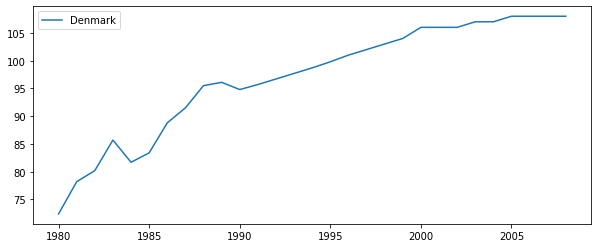

In [18]:
# First I will set the country columns as an index so the country's name will be displayed on the plot as legend
cancer_explore = cancer_explore.set_index('country')

# Next I will plot four separate line plots for all the countries with full data
cancer_explore.iloc[0,:].plot(legend=True,figsize=(10,4));

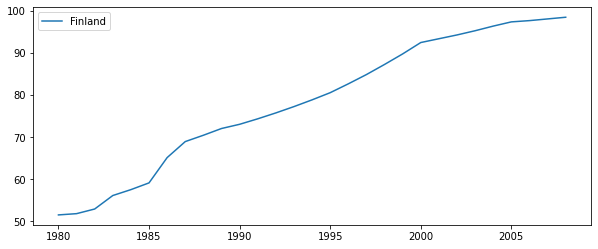

In [19]:
cancer_explore.iloc[1,:].plot(legend=True,figsize=(10,4));

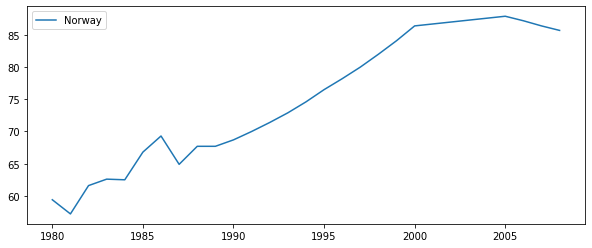

In [20]:
cancer_explore.iloc[2,:].plot(legend=True,figsize=(10,4));

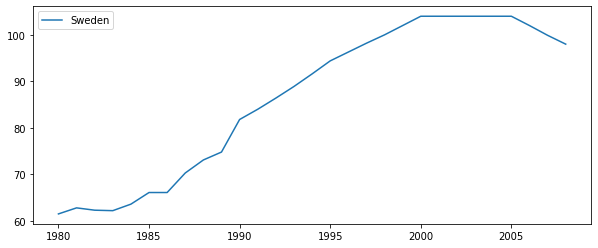

In [21]:
cancer_explore.iloc[3,:].plot(legend=True,figsize=(10,4));

Although some fluctuations are present during the first 9 years of data collection, we can observe a general increase in cancer cases during that period. Because all of the countries are showing a quite steep, linear growth, using row mean values to fill NaN values seems to be a bit oversimplified. Therefore I chose to use a linear interpolation function to fill backward the null values in my dataset. It appeared to me as the best solution, given the above exploration of the values available for this data set. 

In [22]:
cancer_NaN.dtypes

country    object 
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
dtype: object

To use the interpolate function all the data types must be of numeric values, so I will have to drop the country column.  

In [23]:
drop_countries = cancer_NaN.drop('country', axis=1)
drop_countries

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1,22.2,22.3,22.4,22.6,22.7,22.8,22.8,22.8,22.9,22.9,22.9,22.9,23.0,23.0,23.1,23.1,23.1,23.2
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,99.0,99.1,99.2,99.4,99.6,99.2,99.0,98.7,98.5,98.3,97.4,96.6,95.7,95.0,94.3,94.0,93.8,93.6


In [24]:
cancer = drop_countries.T

# I need also change the index dtype to numeric values to able to use the interpolate function
cancer.index = cancer.index.map(int)

cancer.index.dtype

dtype('int64')

In [25]:
Cancer = cancer.interpolate(method='spline', order=1, limit_direction='backward', axis=0)
Cancer

,150,162
1980,21.755614,104.146842
1981,21.809474,103.788421
1982,21.863333,103.430000
1983,21.917193,103.071579
1984,21.971053,102.713158
1985,22.024912,102.354737
1986,22.078772,101.996316
1987,22.132632,101.637895
1988,22.186491,101.279474
1989,22.240351,100.921053


The missing values for the years 1980-1989 were filled backward in a linear fassion, the estimations were calculated based on the available data points. It seemed to me as a better method than just filling the value with the row mean, due to the linear decreasing/growing trend values. 

Next, I will prepare this data frame in a similar way as I did with the previous ones.

In [26]:
Cancer.rename(columns={150:"Cancer Rates Somalia", 162: "Cancer Rates Switzerland"},inplace=True)
Cancer.index = Cancer.index.map(str)
Cancer

,Cancer Rates Somalia,Cancer Rates Switzerland
1980,21.755614,104.146842
1981,21.809474,103.788421
1982,21.863333,103.430000
1983,21.917193,103.071579
1984,21.971053,102.713158
1985,22.024912,102.354737
1986,22.078772,101.996316
1987,22.132632,101.637895
1988,22.186491,101.279474
1989,22.240351,100.921053


In [27]:
# Creating a new variable with a new range of years, as the year range for the industry data set
# is shorter than for the above variables 

selected_years_industry = {'from': 1991, 'to': 2008}

ind = read_and_select_data('industry_occupation_f.csv', selected_years_industry, selected_countries) 
ind

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
142,Somalia,4.08,4.34,4.33,4.98,4.95,4.9,5.01,5.06,5.13,5.05,5.03,4.99,5.0,4.96,4.96,5.0,5.07,5.15
154,Switzerland,16.30,14.70,14.20,14.90,15.20,15.1,13.90,12.90,12.60,12.40,12.30,11.70,11.2,11.30,11.00,11.2,10.70,11.40


In [28]:
Industry = ind.T

Industry.drop(labels='country',inplace=True)
Industry.rename(columns={142:"Industry workers Somalia", 154: "Industry workers Switzerland"},inplace=True)
Industry

,Industry workers Somalia,Industry workers Switzerland
1991,4.08,16.3
1992,4.34,14.7
1993,4.33,14.2
1994,4.98,14.9
1995,4.95,15.2
1996,4.9,15.1
1997,5.01,13.9
1998,5.06,12.9
1999,5.13,12.6
2000,5.05,12.4


In [29]:
# The year-range needed to be also adjusted for the smoking data set 
selected_years_smoking = {'from': 2000, 'to': 2005}

# Somalia is not included into the smoking data set. I decided to substitute it with Chad values, as both 
# countries have comparable HDI, Somalia : 0, and Chad: 0.4

selected_countries_smoking = ['Chad','Switzerland']

# First, I will call a object with the suffix _NaN, as I know from the initial data exploration that this data set
# includes null values
smoking_NaN = read_and_select_data('smoking_f.csv', selected_years_smoking, selected_countries_smoking)
smoking_NaN

,country,2000,2001,2002,2003,2004,2005
20,Chad,2.6,NaN,2.6,NaN,NaN,2.6
112,Switzerland,22.2,NaN,22.2,NaN,NaN,22.2


Due to the fact that each cell in a row contains exactly the same value, I will fill the missing values by the row's mean. (The rather odd character of the above-displayed data set: exact the same values per row, with the same pattern of missing values per country, is beyond the scope of this project.)

Next, I will define a function that will fill in the NaN's as mean values calculated per row. 

In [30]:
# Calculating the mean per row
fill_NaN = smoking_NaN.mean(axis=1)

# Swap the NaN values with means
for i, col in enumerate(smoking_NaN):
            smoking_NaN.iloc[:, i] = smoking_NaN.iloc[:, i].fillna(fill_NaN)


smo = pd.DataFrame(smoking_NaN)
smo

,country,2000,2001,2002,2003,2004,2005
20,Chad,2.6,2.6,2.6,2.6,2.6,2.6
112,Switzerland,22.2,22.2,22.2,22.2,22.2,22.2


In [31]:
Smoking = smo.T

Smoking.drop(labels='country',inplace=True)
Smoking.rename(columns={20:"Smoking Somalia", 112: "Smoking Switzerland"},inplace=True)
Smoking

,Smoking Somalia,Smoking Switzerland
2000,2.6,22.2
2001,2.6,22.2
2002,2.6,22.2
2003,2.6,22.2
2004,2.6,22.2
2005,2.6,22.2


### Merging

Next, I will merge the prepared data frames into one data frame. I will create two additional data frames with Somalia's and Switzerland's data separately, which will give me more freedom when creating visualizations and analyses later on.

In [32]:
dfs_total = [Life_Expectancy,BMI,Cholesterol,Cancer,Industry,Smoking]
data_total = pd.concat(dfs_total,axis=1)

dfs_Somalia = [Life_Expectancy.iloc[:,0],BMI.iloc[:,0],Cholesterol.iloc[:,0],Cancer.iloc[:,0],
               Industry.iloc[:,0],Smoking.iloc[:,0]]
data_Somalia = pd.concat(dfs_Somalia,axis=1)

dfs_Switzerland = [Life_Expectancy.iloc[:,1],BMI.iloc[:,1],Cholesterol.iloc[:,1],Cancer.iloc[:,1],
               Industry.iloc[:,1],Smoking.iloc[:,1]]
data_Switzerland = pd.concat(dfs_Switzerland,axis=1)

data_total

,Life expect. Somalia,Life expect. Switzerland,BMI Somalia,BMI Switzerland,Cholesterol Somalia,Cholesterol Switzerland,Cancer Rates Somalia,Cancer Rates Switzerland,Industry workers Somalia,Industry workers Switzerland,Smoking Somalia,Smoking Switzerland
1980,46.3,79,20.8,23.7,4.66,5.97,21.755614,104.146842,NaN,NaN,NaN,NaN
1981,46.7,79.2,20.9,23.8,4.64,5.95,21.809474,103.788421,NaN,NaN,NaN,NaN
1982,47,79.4,20.9,23.8,4.63,5.92,21.863333,103.430000,NaN,NaN,NaN,NaN
1983,47.3,79.6,21,23.8,4.61,5.9,21.917193,103.071579,NaN,NaN,NaN,NaN
1984,47.6,79.8,21,23.8,4.59,5.88,21.971053,102.713158,NaN,NaN,NaN,NaN
1985,47.7,80,21.1,23.8,4.57,5.86,22.024912,102.354737,NaN,NaN,NaN,NaN
1986,47.8,80.2,21.1,23.8,4.56,5.83,22.078772,101.996316,NaN,NaN,NaN,NaN
1987,47.7,80.4,21.2,23.8,4.54,5.81,22.132632,101.637895,NaN,NaN,NaN,NaN
1988,47.5,80.6,21.3,23.9,4.53,5.78,22.186491,101.279474,NaN,NaN,NaN,NaN
1989,47.2,80.8,21.4,23.9,4.52,5.76,22.240351,100.921053,NaN,NaN,NaN,NaN



On the merged data frames, I will perform the data analyses, but before doing so I will run some visualizations to get a better overview of the data. 

<a id='eda'></a>
## Exploratory Data Analysis

> ### Visual exploration of the data

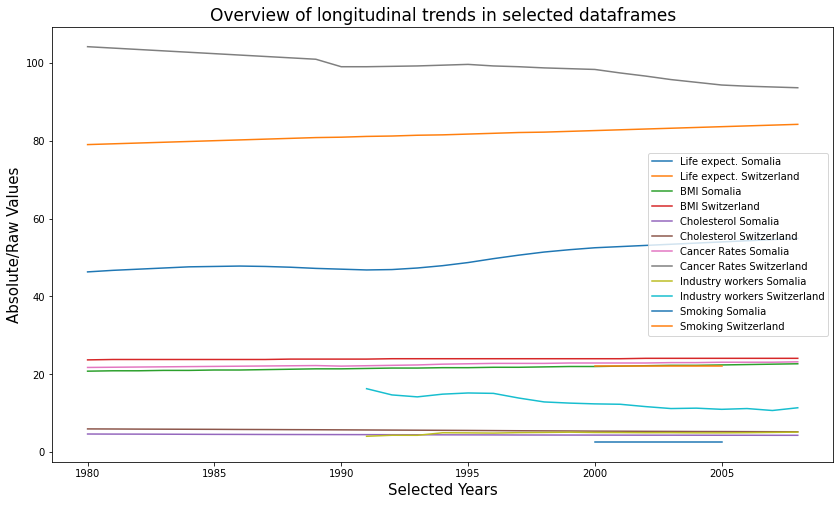

In [33]:
fig1 = data_total.plot(figsize=(14,8))
fig1.legend(loc='best')
fig1.set_ylabel('Absolute/Raw Values', fontsize=15)
fig1.set_xlabel('Selected Years', fontsize=15)
fig1.set_title("Overview of longitudinal trends in selected dataframes", fontsize=17);

The first figure depicts the general trends in the selected variables during the timespan selected for this project. We can observe that most of the variables show a quite stable longitudinal pattern of values. Moreover, we can see that the life expectancy in both countries is increasing, while the rate of increase seems to be higher for Somalia. Among independent variables, the number of new cancer cases and the percentage of industrial workers in Switzerland show the steepest decrease in the past few years.

To get an even better visual interpretation of differences between the countries on the twelve variables, I will make bar plots depicting the mean values. 

In [34]:
# First I need to calculate the mean values for each of the variables
avg_data = pd.DataFrame(data_total.mean())
avg_data

,0
Life expect. Somalia,49.806897
Life expect. Switzerland,81.586207
BMI Somalia,21.682759
BMI Switzerland,23.951724
Cholesterol Somalia,4.465172
Cholesterol Switzerland,5.598276
Cancer Rates Somalia,22.509649
Cancer Rates Switzerland,99.128947
Industry workers Somalia,4.888333
Industry workers Switzerland,12.944444


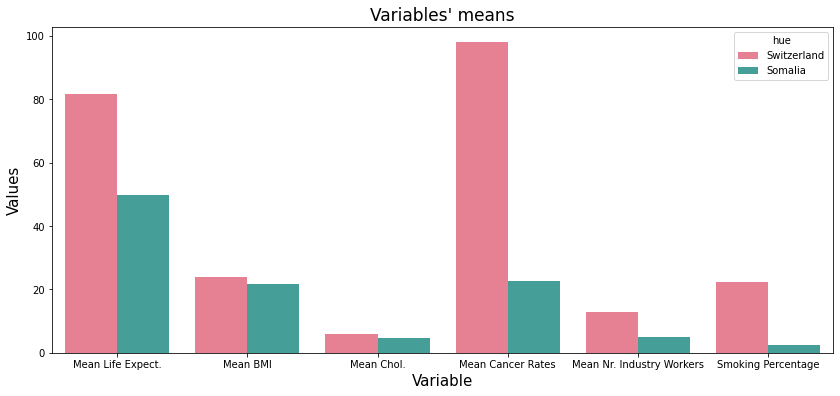

In [35]:
# Now I will create two separate data frames for Somalia and Switzerland, with the variable names and mean values 
# calculated above

df1=pd.DataFrame({'Variable':['Mean Life Expect.','Mean BMI','Mean Chol.','Mean Cancer Rates',
                             'Mean Nr. Industry Workers', 'Smoking Percentage'],'y':[81.6,24,6,98,13,22.2]})
df2=pd.DataFrame({'Variable':['Mean Life Expect.','Mean BMI','Mean Chol.','Mean Cancer Rates',
                             'Mean Nr. Industry Workers', 'Smoking Percentage'],'y':[49.8,21.7,4.7,22.6,4.9,2.6]})

# As hue I will choose the country name so it will be displayed on the graph as a legend
df1['hue']='Switzerland'
df2['hue']='Somalia'

# Before plotting I need to concatenate the two dataframes together, so I can make one figure for both of them
res=pd.concat([df1,df2])

fig2 = plt.figure(figsize = (14,6))
fig2 = sns.barplot(x='Variable',y='y',data=res,hue='hue',palette=("husl"))
fig2.set_xlabel('Variable', fontsize=15)
fig2.set_ylabel('Values', fontsize=15)
fig2.set_title("Variables' means", fontsize=17)
plt.show()              

On the above figure, we can see that Switzerland scores higher than Somalia on all of the variables. The biggest difference seems to be on rates of newly diagnosed cancer cases. We need to keep in mind that there might be multiple explanations of this observation, with longer life expectancy, better health care, and more diagnostic tests in Switzerland, being just one of them. The smallest differences between the countries seem to be on measurements of BMI and cholesterol levels in the blood. However, it is important to keep in mind that the y-axis depicts absolute values, whereas the variables' values are measured on different scales (numerical, percentage, ratio), so comparing the magnitude of differences between the variables doesn't make a lot of sense. 

Instead, I will move along and check the distribution of the values for each of the variables separately by making subplots.  

/home/maggie/.local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/maggie/.local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


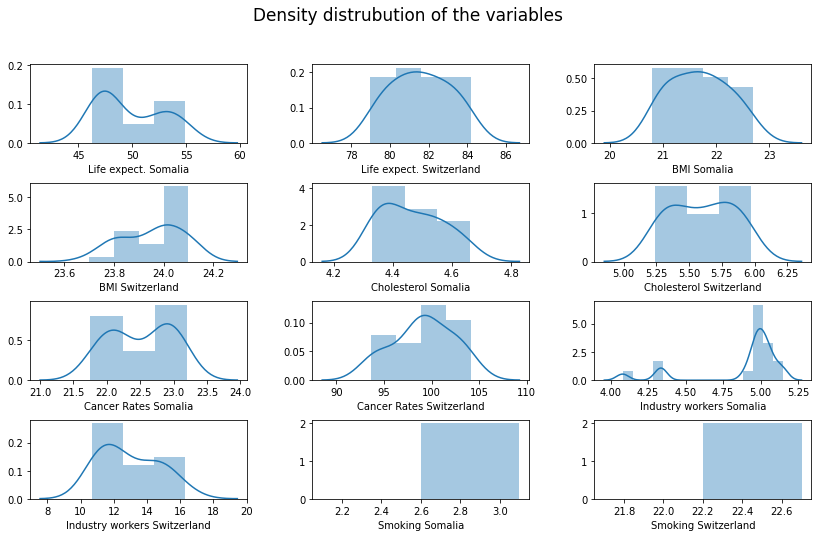

In [36]:
# By plotting next figure, I was getting very long deprecation warning,
# so for clarity and better visibility, I suppressed it.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Setting the shape (4 rows, 3 columns) and size of the figure
fig, axes = plt.subplots(4,3, figsize=(14,8))
# Flattening the axes to access them easier by index later on
axes = axes.flatten()
# Adjusting the space between the subplots 
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

# Creating a for loop to create the subplots
i = 0
for _, col_data in data_total.iteritems():
    sns.distplot(col_data, ax=axes[i])
    i += 1
    
fig.suptitle('Density distrubution of the variables',fontsize=17);


The above figure presents the density distribution for each of the variables in each of the countries. More precisely, for a given variable, it shows us the distribution of values across the years. For example, considering the case of the dependent variable: life expectancy, we can see that most of the values for the Somalia distribution are in the ranges: 46-48 and 53-55, the two peaks on the graph. The values in between are much less common in the dataset. In the case of Switzerland's life expectancy, we can see that all the values from the data (range 79-84) are very evenly distributed, their distribution looks similar to the well known normal distribution. For each of the subfigures, a KDE plot has also been created, which is a sort of probability estimation function based on the values in data set. The plot is scattered between the minimum and maximum values for a given variable, with 'bumps' of density distribution, representing a higher number of data points around this area. The disputable character of the Smoking data frame, is easily noticeable on the above figure, as it stands out from the rest. For cases like plotting the density distribution is of course without any value. 

Next, I will define a function to create subplots, for each of the countries, presenting the relationship between the dependent variable (life expectancy) and each of the independent variables. 

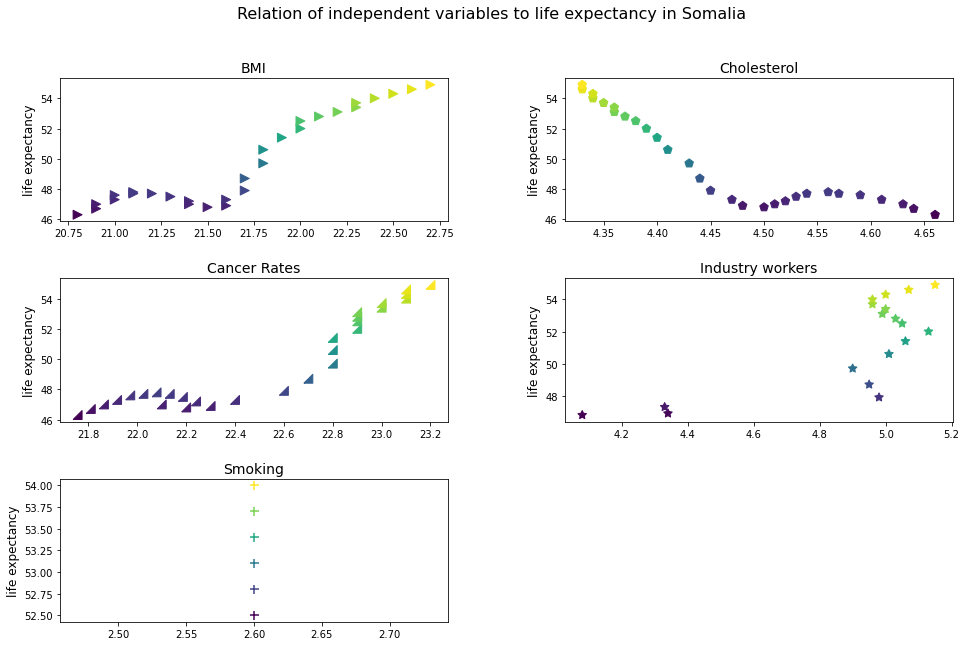

In [37]:
def create_subplots(data, col, country, i):
    # Next I need to convert values from each of the columns to np.array and drop the index values 
    x = np.array(data[f'{col["col_name"]} {country}'].reset_index(drop=True))
    y = np.array(data[f'Life expect. {country}'].reset_index(drop=True))
    # To customize my color map I will create a new variable containing a list of indices to retrieve colors from
    # the palette, in this way for each of the subplots I will have the same spectrum of colors corresponding to 
    # a given x and y values
    z = np.sqrt(list(x**2 + y**2))
    
    # Defining the location of the subplot
    plt.subplot(321 + i)
    # Plotting the figure for a given x and y, with specified marker size (s), colormap (c) and type of the marker
    plt.scatter(x, y, s=80, c=z, marker=col["marker"])
    # Setting the the title for the subplot and common name for y-axis
    plt.gca().set_title(col["col_name"],fontsize=14)
    plt.gca().set_ylabel('life expectancy',fontsize=12) 


# Collecting the values that are different for each subplot
columns = [
    {
        "col_name": 'BMI',
        "marker": ">"  
    },
    {
        "col_name": 'Cholesterol',
        "marker": (5, 0)  
    },
    {
        "col_name": 'Cancer Rates',
        "marker": np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
    },
    {
        "col_name": 'Industry workers',
        "marker": (5, 1)
    },
    {
        "col_name": 'Smoking',
        "marker": "+"  
    },
]

# Defining the size of the figure
plt.subplots(figsize=(16, 10))
# Creating subplots (using enumerate to access the indices as well)
for i, col in enumerate(columns):
    create_subplots(data_total, col, "Somalia", i)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.suptitle('Relation of independent variables to life expectancy in Somalia',fontsize=16)
plt.show()

The following observation can be drawn based on the above figure: 

1. There is a positive correlation between BMI and life expectancy: the higher the BMI, the higher one's life span. This is observation is quite intuitive, as people are more likely in Somalia to die because of food deprivation rather than the surplus of food, and diseases it might cause. Moreover, even the highest BMI values in Somalia are still to be perceived as healthy, as they are smaller than 25. 
 
2. There is a negative correlation between levels of 'bad' cholesterol in blood and life expectancy: people with the lowest measurements on this variable tend to live the longest. Interestingly, this correlation seems to be the most pronounced for cholesterol's values of 4.5 and lower, whereas for the higher cholesterol's values there seems to be none or very week relationship between those two variables for this dataset. 

3. There seems to be a positive relationship between cancer rates and life expectancy: the older one gets, the higher the probability that one will be diagnosed with cancer. This is a very intuitive observation, as people around the world tend to face more and more health difficulties as they are getting older, which makes it very clear that there is probably a third variable or a set of variables, that affects this relationship. 

4. There seem to be no linear relationship between industry employment in Somalia and life expectancy. Moreover, the percentage of industrial employers is very low and stable across all the years, around 4 to 5%. However, the higher values of life expectancy are more likely to be found for industrial rates higher than 5%, than for the rates below that threshold. When interpreting this figure, we need to keep in mind the very difficult socio-economic situation in Somalia. With ongoing wars, terrorist attacks, and high unemployment rates, the chances for industrial employment might be of bigger importance, to sustain life, which will assessed later on in analyses. 

5. There is no correlation between smoking rates and life expectancy, which is quite expected giving the low quality of Smoking data frame. 

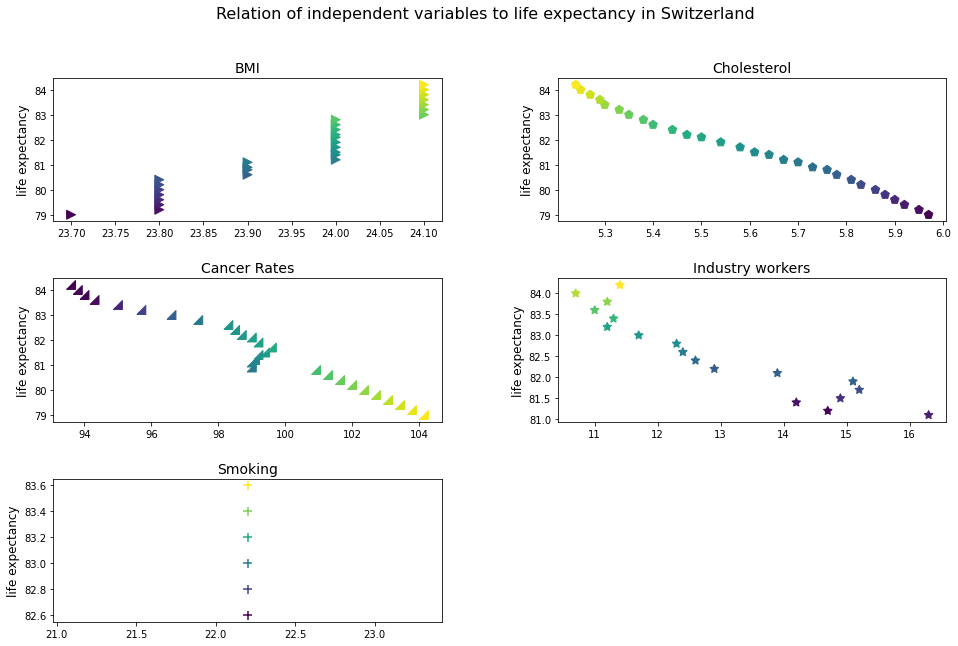

In [38]:
plt.subplots(figsize=(16, 10))
for i, col in enumerate(columns):
    create_subplots(data_total, col, "Switzerland", i)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.suptitle('Relation of independent variables to life expectancy in Switzerland',fontsize=16)
plt.show()

The following observation can be drawn based on the above figure: 

1. There is a positive correlation between BMI and life expectancy: the higher the BMI, the higher one's life span, or with another words the older one gets, the higher his/her BMI. The BMI range is smaller and higher than that recorded in Somalia, although still in the range of being healthy. 
 
2. There is a negative correlation between levels of 'bad' cholesterol in blood and life expectancy: people with the lowest measurements on this variable tend to live the longest. For all of the data points, the measurements of the cholesterol are higher than those from Somalia's data. Cholesterol seems to be closely and negatively related to life expectancy in both datasets, which gives me the intuition that it might be one of the strongest indicators for life expectancy in this project. 

3. In contrary to Somalia's dataset, there is a negative relationship between cancer rates and life expectancy: the lower the cancer rates, the higher the life expectancy. Caution is needed when interpreting those differences between the countries. At its highest point, the cancer rates in Switzerland are almost four times of the values of Somalia's ones, those pronounced differences in cancer rates might affect the dependent variable in a differing manner.

4. There seem to be a negative, linear relationship between industry employment in Switzerland and life expectancy. The percentage of industrial employers is roughly three times higher than Somalia's rates, and it shows a systematic decrease in the last 10 years of the dataset. Considering the political and economical situation in Switzerland will help to understand the magnitude of this relationship. Switzerland is the second most developed country in the world, with a very stable economy, high political autonomy, and one of the lowest unemployment rates in Europe. Therefore working in an industry sector in Switzerland, might be perceived as a risk factor, causing premature deaths, the significance of this observation will be tested in the analyses later on. 

5. Similarly, there is no correlation between smoking rates and life expectancy, due to the low predictive value of Smoking data frame.

For most of the independent variables in the least two figures, we observed the desired outcome, namely that data points are symmetrically distributed around a horizontal line of each of the subfigures, and on none of them, we saw a ‘bowed’ pattern indicating a non-linear relationship. By this, we can assume that our model is linear, and can move forward to statistical analyses applying that method. 

### Statystical analyses

> In the following section, I will use the data frames created above, separate data frames for Somalia and Switzerland variables. Let's take a look on one of them

In [39]:
data_Somalia

,Life expect. Somalia,BMI Somalia,Cholesterol Somalia,Cancer Rates Somalia,Industry workers Somalia,Smoking Somalia
1980,46.3,20.8,4.66,21.755614,NaN,NaN
1981,46.7,20.9,4.64,21.809474,NaN,NaN
1982,47,20.9,4.63,21.863333,NaN,NaN
1983,47.3,21,4.61,21.917193,NaN,NaN
1984,47.6,21,4.59,21.971053,NaN,NaN
1985,47.7,21.1,4.57,22.024912,NaN,NaN
1986,47.8,21.1,4.56,22.078772,NaN,NaN
1987,47.7,21.2,4.54,22.132632,NaN,NaN
1988,47.5,21.3,4.53,22.186491,NaN,NaN
1989,47.2,21.4,4.52,22.240351,NaN,NaN


To perform statistical analyses a data frame can't have any missing values. However, the year-range for Industry and Smoking data frames are shorter than for the rest of the variables, causing a lot of missing values. Between dropping the Industry and Smoking data frames and performing the analyses without them or filling the missing values and include all independent variables into the model, I chose the latter one. The above visualization suggests that industrial rates might be a strong indicator of life expectancy, so I definitely want to test it. 

I will fill all the missing values by the variable's mean value.

In [40]:
data_Somalia['Industry workers Somalia'].fillna((data_Somalia['Industry workers Somalia'].mean()), inplace=True)
data_Somalia['Smoking Somalia'].fillna((data_Somalia['Smoking Somalia'].mean()), inplace=True)

data_Switzerland['Industry workers Switzerland'].fillna((data_Switzerland['Industry workers Switzerland'].mean()),
                                                        inplace=True)
data_Switzerland['Smoking Switzerland'].fillna((data_Switzerland['Smoking Switzerland'].mean()), inplace=True)

In [41]:
data_Somalia

,Life expect. Somalia,BMI Somalia,Cholesterol Somalia,Cancer Rates Somalia,Industry workers Somalia,Smoking Somalia
1980,46.3,20.8,4.66,21.755614,4.888333,2.6
1981,46.7,20.9,4.64,21.809474,4.888333,2.6
1982,47,20.9,4.63,21.863333,4.888333,2.6
1983,47.3,21,4.61,21.917193,4.888333,2.6
1984,47.6,21,4.59,21.971053,4.888333,2.6
1985,47.7,21.1,4.57,22.024912,4.888333,2.6
1986,47.8,21.1,4.56,22.078772,4.888333,2.6
1987,47.7,21.2,4.54,22.132632,4.888333,2.6
1988,47.5,21.3,4.53,22.186491,4.888333,2.6
1989,47.2,21.4,4.52,22.240351,4.888333,2.6


To answer the research question of this project, I will perform two types of analysis (for each of the countries), as they can be easily implemented, and they can be used as each others substitutes. First I will use sklearn to fit a multivariate linear regression, and calculate the needed coefficients. Later on, I will use statsmodels to implement the ordinary least square estimations of the coefficients. The advantage of the latter one is that it provides the most optimal set of coefficient values, aiming to produce the lowest possible root square error. Moreover, all the estimations done with the OLS are provided with the p-values, indicating their significance. 

Let's go ahead and fit the first models. 

In [42]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [43]:
# Create a LinearRegression Object
lreg_Somalia = LinearRegression()

# Create an object containing the data values (independent variables)
X_Somalia = data_Somalia.drop('Life expect. Somalia',1)

# Create a target object (dependent variable)
Y_Somalia = data_Somalia['Life expect. Somalia']

# Implement Linear Regression
lreg_Somalia.fit(X_Somalia,Y_Somalia)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
                                          # using .2f expression allows me to round the number up to two decimals
print(' The estimated intercept coefficient is %.2f ' %lreg_Somalia.intercept_) 
print(' The coefficient of determination (R^2) is %.2f' %lreg_Somalia.score(X_Somalia, Y_Somalia))

 The estimated intercept coefficient is -159.09 
 The coefficient of determination (R^2) is 0.93


In [45]:
# Here I create a new object: coeffs, containing the values of coefficients for chosen variable
coeffs = ""
for coef in lreg_Somalia.coef_:
    coeffs += "%.2f " %coef


print(f" The estimates of the variables' coefficients are {coeffs}")

 The estimates of the variables' coefficients are 5.71 12.49 1.36 3.17 -6.45 


In the next steps, I will create a new data frame containing all the coefficients' values for the Somalia data. 

In [46]:
# Data frame for variables' coefficients
coeff_df_Somalia = DataFrame(data_Somalia.drop('Life expect. Somalia',1).columns)
coeff_df_Somalia.columns = ['Features']

coeff_df_Somalia['Coefficient Estimates'] = Series(lreg_Somalia.coef_)

In [47]:
coeff_df_Somalia

,Features,Coefficient Estimates
0,BMI Somalia,5.711196
1,Cholesterol Somalia,12.492980
2,Cancer Rates Somalia,1.358629
3,Industry workers Somalia,3.165535
4,Smoking Somalia,-6.452913


In [48]:
# Data frame for intercept and R^2
other_coeff_Somalia = DataFrame([
    {   'Features':'Intercept Coeff',
        'Coefficient Estimates':'-159.15'
    },{ 'Features' : 'Coeff. of Determination',
        'Coefficient Estimates':'0.94'}])
                                             

In [49]:
other_coeff_Somalia

,Features,Coefficient Estimates
0,Intercept Coeff,-159.15
1,Coeff. of Determination,0.94


In [50]:
coeff_data_Somalia = other_coeff_Somalia.append(coeff_df_Somalia)

In [51]:
coeff_data_Somalia

,Features,Coefficient Estimates
0,Intercept Coeff,-159.15
1,Coeff. of Determination,0.94
0,BMI Somalia,5.7112
1,Cholesterol Somalia,12.493
2,Cancer Rates Somalia,1.35863
3,Industry workers Somalia,3.16553
4,Smoking Somalia,-6.45291


Next, I will repeat all the steps for the Swtzerland data and compare the obtained data frames.

In [52]:
lreg_Switzerland = LinearRegression()
X_Switzerland = data_Switzerland.drop('Life expect. Switzerland',1)
Y_Switzerland = data_Switzerland['Life expect. Switzerland']
lreg_Switzerland.fit(X_Switzerland,Y_Switzerland)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print(' The estimated intercept coefficient is %.2f ' %lreg_Switzerland.intercept_)
print(' The coefficient of determination (R^2) is %.2f' %lreg_Switzerland.score(X_Switzerland, Y_Switzerland))

coeffs = ""
for coef in lreg_Switzerland.coef_:
    coeffs += "%.2f " %coef


print(f" The estimates of the variables' coefficients are {coeffs}")

 The estimated intercept coefficient is 85.56 
 The coefficient of determination (R^2) is 1.00
 The estimates of the variables' coefficients are -0.21 -4.66 -0.15 0.02 1.87 


In [54]:
coeff_df_Switzerland = DataFrame(data_Switzerland.drop('Life expect. Switzerland',1).columns)
coeff_df_Switzerland.columns = ['Features']
coeff_df_Switzerland['Coefficient Estimates'] = Series(lreg_Switzerland.coef_)

other_coeff_Switzerland = DataFrame([
    {   'Features':'Intercept Coeff',
        'Coefficient Estimates':'74.26'
    },{ 'Features' : 'Coeff. of Determination',
        'Coefficient Estimates':'0.99'}])

coeff_data_Switzerland = other_coeff_Switzerland.append(coeff_df_Switzerland)
coeff_data_Switzerland

,Features,Coefficient Estimates
0,Intercept Coeff,74.26
1,Coeff. of Determination,0.99
0,BMI Switzerland,-0.208583
1,Cholesterol Switzerland,-4.66396
2,Cancer Rates Switzerland,-0.146678
3,Industry workers Switzerland,0.0150376
4,Smoking Switzerland,1.86838


In [55]:
combined = pd.concat([coeff_data_Switzerland, coeff_data_Somalia],axis=1)
combined

,Features,Coefficient Estimates,Features,Coefficient Estimates
0,Intercept Coeff,74.26,Intercept Coeff,-159.15
1,Coeff. of Determination,0.99,Coeff. of Determination,0.94
0,BMI Switzerland,-0.208583,BMI Somalia,5.7112
1,Cholesterol Switzerland,-4.66396,Cholesterol Somalia,12.493
2,Cancer Rates Switzerland,-0.146678,Cancer Rates Somalia,1.35863
3,Industry workers Switzerland,0.0150376,Industry workers Somalia,3.16553
4,Smoking Switzerland,1.86838,Smoking Somalia,-6.45291


With so calculated coefficients we are able to predict Y: life expectancy giving the values of the model predictors: independent variables. The coefficients in Somalia and Switzerland are highly different for each of the variables, suggesting differences in directionality and magnitude of their relationship with the dependent variable. Comparing these results, with the above-performed visualizations cause some discrepancies. For example, the visualizations revealed a negative relationship between cholesterol levels and life expectancy, whereas here Somalia's coefficient for cholesterol has a positive value. Another discrepancy is the above depicted negative correlation between rates of industrial employees and life expectancy in Switzerland and the positive coefficient in the table above. Lastly, the negative value of BMI for Switzerland is also not in accordance with the above visualizations.

Another important information that we can read out from this table are coefficients of determination: the root square errors. The root square error can have a value between 0 and 1, and it states the proportion of variance in the dependent variable that can be explained by the variance in the independent variable(s). In the above example, we can see that 99 and 94% of the variance in life expectancy, can be explained by the models' parameters. 

Let's move on to the following section, where I will perform the same analyses using statsmodels.  

In [56]:
from sklearn import linear_model
import statsmodels.api as sm

In [57]:
# To perform the sm.OLS analyses we need to change the our variables type from object to float
OLS_model_Somalia = sm.OLS(Y_Somalia.astype(float),X_Somalia.astype(float), data=data_Somalia).fit()
print(OLS_model_Somalia.summary())

                             OLS Regression Results                             
Dep. Variable:     Life expect. Somalia   R-squared:                       0.929
Model:                              OLS   Adj. R-squared:                  0.918
Method:                   Least Squares   F-statistic:                     79.06
Date:                  Tue, 12 May 2020   Prob (F-statistic):           1.85e-13
Time:                          14:32:21   Log-Likelihood:                -34.071
No. Observations:                    29   AIC:                             78.14
Df Residuals:                        24   BIC:                             84.98
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BMI 

In the top right corner of the table above, we can see the value of R-squared: 0.93, which almost perfectly aligns with the value calculated using the Linear Regression technique. However, OLS provides us also with Adj. R-squared, which corrects for the number of parameters in the model, which makes this estimator more robust than the former one. Another important addition of the OLS-table is the total significance value for the whole model, called Prob (F-statistic). In the above example is this a very small value of 1.85 e-13, meaning that there is only a 1.85 e-11% chance that results presented above would have come up in a random distribution, if there would be no effect of independent variables on the dependent variable.

In the second part of the table we can see the variables' names, and estimates of the coefficients' values, and more importantly the associated p-values. According to this model the significant predictors (p <=0.05) of life expectancy in Somalia are: BMI and rates of industrial employment. Lastly, we can also notice that all, but one (Smoking), estimated coefficients' values are the same as estimations done using Linear Regression.

In [58]:
OLS_model_Switzerland = sm.OLS(Y_Switzerland.astype(float),X_Switzerland.astype(float),data=data_Switzerland).fit()
print(OLS_model_Switzerland.summary())

                               OLS Regression Results                               
Dep. Variable:     Life expect. Switzerland   R-squared:                       0.996
Model:                                  OLS   Adj. R-squared:                  0.995
Method:                       Least Squares   F-statistic:                     1511.
Date:                      Tue, 12 May 2020   Prob (F-statistic):           1.90e-28
Time:                              14:32:21   Log-Likelihood:                 27.136
No. Observations:                        29   AIC:                            -44.27
Df Residuals:                            24   BIC:                            -37.44
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In a similar way, we can interpret the OLS-Switzerland table. This model has even higher than Somalia's one, Adj. R-squared value of 1, and Prob value of 1.90 e-28. According to this model, the strongest predictors of life expectancy in Switzerland are cholesterol levels, cancer rates. Similarly, we can also see that all estimated coefficients' values are the same as estimations done using Linear Regression, expect the value calculated for the Smoking coefficient. 

To increase the predictability of my models, and reduce noise, produced by marginal or, not significant predictors, I could fit new models, only with the variables that were significant in tables above. However, because all the predictors in a model are 'interacting' with each other, adding or removing a variable from the model, can have consequences on how well the remaining variables will fit the model. In the current models, I had originally 5 independent variables for each of the countries, which gives 32 different subsets of model possibilities (2 ** 5) per country. To perform the best model selection, I will fit separate models for each possible combination of the n predictors and then select the best subset, by choosing a model with the highest Adj. R-squared and lowest residual sum of squares (RSS). 

In [59]:
from sklearn.metrics import mean_squared_error
import itertools
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [60]:
# Creating variable k: the total number of predictors in the model
k = 5
#Creating empty list to which later on, I will append the calculated values
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []


#Looping over k = 1 to k = 5 features in X_Somalia
for k in tnrange(1,len(X_Somalia.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations for k
    for combo in itertools.combinations(X_Somalia.columns,k):
        #Storing temporary results
        tmp_result = fit_linear_reg(X_Somalia[list(combo)],Y_Somalia)  
        # Appending results to the above created lists
        RSS_list.append(tmp_result[0])                 
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))  

/home/maggie/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  if __name__ == '__main__':


In [61]:
#Storing the results in a DataFrame
df_Somalia_final = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,
                   'features':feature_list})

In [62]:
# Now, I can find the best subsets for each number of features by using the smallest RSS value, or the largest 
# R_squared value

df_Somalia_min = df_Somalia_final[df_Somalia_final.groupby('numb_features')['RSS'].transform(min) == df_Somalia_final['RSS']]
df_Somalia_max = df_Somalia_final[df_Somalia_final.groupby('numb_features')['R_squared'].transform(max) == df_Somalia_final['R_squared']]
display(df_Somalia_min)
display(df_Somalia_max)

,numb_features,RSS,R_squared,features
0,1,35.614771,0.858850,"(BMI Somalia,)"
7,2,18.710215,0.925847,"(BMI Somalia, Industry workers Somalia)"
16,3,17.991805,0.928694,"(BMI Somalia, Cholesterol Somalia, Industry workers Somalia)"
25,4,17.799053,0.929458,"(BMI Somalia, Cholesterol Somalia, Cancer Rates Somalia, Industry workers Somalia)"
30,5,17.799053,0.929458,"(BMI Somalia, Cholesterol Somalia, Cancer Rates Somalia, Industry workers Somalia, Smoking Somalia)"


,numb_features,RSS,R_squared,features
0,1,35.614771,0.858850,"(BMI Somalia,)"
7,2,18.710215,0.925847,"(BMI Somalia, Industry workers Somalia)"
16,3,17.991805,0.928694,"(BMI Somalia, Cholesterol Somalia, Industry workers Somalia)"
25,4,17.799053,0.929458,"(BMI Somalia, Cholesterol Somalia, Cancer Rates Somalia, Industry workers Somalia)"
30,5,17.799053,0.929458,"(BMI Somalia, Cholesterol Somalia, Cancer Rates Somalia, Industry workers Somalia, Smoking Somalia)"


In [63]:
# Adding columns to the dataframe with RSS and R squared values of the best subset, so in the each row we can 
# compare those best-fit values with the values for a given subset

df_Somalia_final['min_RSS'] = df_Somalia_final.groupby('numb_features')['RSS'].transform(min)
df_Somalia_final['max_R_squared'] = df_Somalia_final.groupby('numb_features')['R_squared'].transform(max)
df_Somalia_final

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,35.614771,0.858850,"(BMI Somalia,)",35.614771,0.858850
1,1,49.698302,0.803034,"(Cholesterol Somalia,)",35.614771,0.858850
2,1,37.203915,0.852552,"(Cancer Rates Somalia,)",35.614771,0.858850
3,1,176.004908,0.302450,"(Industry workers Somalia,)",35.614771,0.858850
4,1,252.318621,0.000000,"(Smoking Somalia,)",35.614771,0.858850
5,2,34.663944,0.862618,"(BMI Somalia, Cholesterol Somalia)",18.710215,0.925847
6,2,33.582124,0.866906,"(BMI Somalia, Cancer Rates Somalia)",18.710215,0.925847
7,2,18.710215,0.925847,"(BMI Somalia, Industry workers Somalia)",18.710215,0.925847
8,2,35.614771,0.858850,"(BMI Somalia, Smoking Somalia)",18.710215,0.925847
9,2,35.602290,0.858899,"(Cholesterol Somalia, Cancer Rates Somalia)",18.710215,0.925847


Now, I will repeat these analyses for the Switzerland dataset, to, later on, interpret the findings, and finally, answer the research questions.

In [64]:
k = 5
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

for k in tnrange(1,len(X_Switzerland.columns) + 1, desc = 'Loop...'):

    for combo in itertools.combinations(X_Switzerland.columns,k):
        tmp_result = fit_linear_reg(X_Switzerland[list(combo)],Y_Switzerland)   
        RSS_list.append(tmp_result[0])                
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))  
        
df_Switzerland_final = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,
                   'features':feature_list})

df_Switzerland_min = df_Switzerland_final[df_Switzerland_final.groupby('numb_features')['RSS'].transform(min) == df_Switzerland_final['RSS']]
df_Switzerland_max = df_Switzerland_final[df_Switzerland_final.groupby('numb_features')['R_squared'].transform(max) == df_Switzerland_final['R_squared']]
display(df_Switzerland_min)
display(df_Switzerland_max)

/home/maggie/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """


,numb_features,RSS,R_squared,features
1,1,0.681302,0.989686,"(Cholesterol Switzerland,)"
9,2,0.268332,0.995938,"(Cholesterol Switzerland, Cancer Rates Switzerland)"
21,3,0.262485,0.996026,"(Cholesterol Switzerland, Cancer Rates Switzerland, Industry workers Switzerland)"
25,4,0.261310,0.996044,"(BMI Switzerland, Cholesterol Switzerland, Cancer Rates Switzerland, Industry workers Switzerland)"
30,5,0.261310,0.996044,"(BMI Switzerland, Cholesterol Switzerland, Cancer Rates Switzerland, Industry workers Switzerland, Smoking Switzerland)"


,numb_features,RSS,R_squared,features
1,1,0.681302,0.989686,"(Cholesterol Switzerland,)"
9,2,0.268332,0.995938,"(Cholesterol Switzerland, Cancer Rates Switzerland)"
21,3,0.262485,0.996026,"(Cholesterol Switzerland, Cancer Rates Switzerland, Industry workers Switzerland)"
25,4,0.261310,0.996044,"(BMI Switzerland, Cholesterol Switzerland, Cancer Rates Switzerland, Industry workers Switzerland)"
30,5,0.261310,0.996044,"(BMI Switzerland, Cholesterol Switzerland, Cancer Rates Switzerland, Industry workers Switzerland, Smoking Switzerland)"


In [65]:
df_Switzerland_final['min_RSS'] = df_Switzerland_final.groupby('numb_features')['RSS'].transform(min)
df_Switzerland_final['max_R_squared'] = df_Switzerland_final.groupby('numb_features')['R_squared'].transform(max)
df_Switzerland_final

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,5.903077,0.910633,"(BMI Switzerland,)",0.681302,0.989686
1,1,0.681302,0.989686,"(Cholesterol Switzerland,)",0.681302,0.989686
2,1,2.778080,0.957943,"(Cancer Rates Switzerland,)",0.681302,0.989686
3,1,51.492844,0.220449,"(Industry workers Switzerland,)",0.681302,0.989686
4,1,66.054483,0.000000,"(Smoking Switzerland,)",0.681302,0.989686
5,2,0.653525,0.990106,"(BMI Switzerland, Cholesterol Switzerland)",0.268332,0.995938
6,2,2.040937,0.969102,"(BMI Switzerland, Cancer Rates Switzerland)",0.268332,0.995938
7,2,4.163020,0.936976,"(BMI Switzerland, Industry workers Switzerland)",0.268332,0.995938
8,2,5.903077,0.910633,"(BMI Switzerland, Smoking Switzerland)",0.268332,0.995938
9,2,0.268332,0.995938,"(Cholesterol Switzerland, Cancer Rates Switzerland)",0.268332,0.995938


<a id='conclusions'></a>
## Conclusions

### Research question 1: 
 > Which of the independent variables are the best predictors of life expectancy? 
 
 > **Somalia:**
 > The single strongest predictor of life expectancy is the **BMI**, with the Adj. R-squared value of 0.86 and RSS of 35.62. The best-fitting model for the Somalian data set is composed of **BMI** and **Industry**, as it increases the Adj. R-squared value up to 0.93, and lowess the RSS to 18.71. Adding additional variables doesn't increase the value of model predictability, and only marginally decrease the RSS. With the marginal difference in a parameter value, we need to ask ourselves the question if upgrading of the model (accounting here for reduction of the RSS by 0.72) is worth the cost of that additional parameter(s) (collecting the additional data and performing the additional analyses). Further on, when can also see that the two variables composing the best-fit model based on R-squared and RSS, were also the two significant variables from the OLS-table, which strengthens my conclusions. 
 
 > **Switzerland**
 > The single strongest predictor of life expectancy is **Cholesterol**, with the Adj. R-squared of 0.99, and RSS of 0.68. Adding variable Cancer Rates to the model helps to decrease the RSS up to 0.27, while adding any other parameters, have almost no effect on the predictive value of the model. That is why I would conclude that model compose of **Cholesterol** and **Cancer** is the best-fitting one. The only discrepancy here is that the OLS-technique also estimates the value of the Smoking variable as being highly significant (p<0.001), while here this variable is estimated as not adding any predictive value to the model (R-squared = 0). It might be caused by the fact that the Adj.R-squared value in OLS-technique is calculated for the totality of the model, while above we were able to calculate the R-squared for each of the variables separately. In this case, the Smoking parameter proved to add zero predictive value to the model, despite the fact that its t-test value appeared to be significant.

### Research question 2: 

 > Do, and if yes how the developing and developed countries differ in terms of the predictive value of the independent variables? 
 
 > When considering the discrepancies between developing and developed countries on the predictive value of independent variables, we can see that BMI and Cholesterol are the strongest, single predictors of life expectancy in developing, and developed countries, respectively, with higher BMI, and lower cholesterol levels being associated with longer life span. It illustrates very well the general economic situation in each of the countries. When, *in developing countries, the chances of one' s survivor might dependent highly on the accessibility of food* (hence being related to one's BMI), *the omnipresence of the food in the developed counties*,  might influence one's dietary choices, which might account for higher cholesterol level, *being broadly associated with a wide spectrum of cardiovascular disorders, shortening one's life span*. Further on, in developed countries are the Industry Rates, the second strongest, and the second most frequently chosen parameter accounting for the best fit, whereas this variable has very little predictive value in models of developed countries. Moreover, the positive value of the Industry coefficient indicates that the higher the industry rates, the higher life expectancy, which makes sense as *a stable income in developing countries might be of big importance for a survival chance, whereas in developed countries citizens might count for some kind of dole*. Lastly, enlarging the model by adding additional parameters for developing countries, significantly increases the predictive value of the model, from 0.86 (when the model includes 1 parameter) to 0.93 (for the best-fit model). On the other hand, addition of parameters for developed countries doesn't increase the predictive value of the model, as Adj. R-squared increases from 0.99 (for 1 parameter) to 1 (for the best fit-model), the only gain is to be found in the reduction of residual errors by 0.41.

### Limitations

 > The following limitations can account for inreliability of the drawn conclusions: 
 
 1. The missing values: the choice of filling method is always to some extent a subjective choice. When making such a decision, even when to our knowledge we are choosing the best possible method, we need to be aware that those estimations will contain prediction errors, which is avoidable in data set without missing values.
 2. The shorter year range for Industry and Smoking variables: it accounts for lower power of those indicators in comparison to the variables with more data points, as well as lowest the quality of the data as I needed to run the estimates for missing values. 
 3. Substituting the data set: as there was no available data on the smoking rates in Somalia, I used Chad's statistics instead. However, the actual values of the Somalian female smokers could be significantly different.
 4. The generalization of the data: the choice of the countries for the current project, although guided by HDI ranking, was after all a personal one. It is possible that by choosing other countries, or including more of them into the analyses, we would get different results. So, there is a little justification to generalize the above findings to the categories of developing and developed countries. Another reason limiting the generalizability of the results is the fact that no male data was used to answer the research questions.  
 5. The choice of predictors: similarly, although an external source pointed these particular independent variables, as one commonly considered to be risk factors for premature death, it is possible that a different set of predictors, could account for a better model. Moreover, it is possible that the observed interactions are in reality moderate or caused by a third variable or a set of variables that were not included in my models. 
 6. The multicolinearity of predictors: one of the assumptions of the multivariate, linear regression is that the chosen parameters are independent of each other. However, this assumption was not tested for this project, which might result in an increased variance of regression's coefficients. 
 7. Not checking for all of the assumptions of the linear regression: the only assumption that was checked for this project was the linearity of the relationships, which was tested using visual representations. Testing of the remaining assumptions of the linear regressions were, in my opinion, out of scope for this project.
 
 However, I would like to add that no real data will conform exactly to linear regression assumptions. Some violations make the results worthless, others are usually trivial. If the data points are close to independent, and there are no obvious patterns in the data or large outliers, the data set has at least 30 observations per parameter, and the dependent and independent variables have roughly linear relations over the range of the independent variables; the results should be reasonably reliable over that same range. However, in the absence of some strong theoretical insight, it is dangerous to extrapolate the results outside that range or generalize the results.